# 모듈, 라이브러리 불러오기

In [8]:
from sklearn.decomposition import TruncatedSVD # 특이값 분해 모듈
from scipy.sparse.linalg import svds # 선형대수 모듈
import matplotlib.pyplot as plt # 그래프 그리는 라이브러리
import seaborn as sns # 데이터 시각화 라이브러리 (matplot 하위 모듈)
import pandas as pd # 데이터 분석 라이브러리
import numpy as np # 수학 계산용 라이브러리
import warnings 
warnings.filterwarnings("ignore")


# 데이터 전처리
데이터 전처리는 앞의 예제와 동일합니다.

In [9]:
rating_data = pd.read_csv('./ratings.csv') # 관객 평점 데이터
movie_data = pd.read_csv('./movies.csv') #영화 데이터
rating_data.drop('timestamp', axis = 1, inplace = True) # Timestamp 요소 제거
user_movie_data = pd.merge(rating_data, movie_data, on = 'movieId') # movieId 요소를 기준으로 merge
user_movie_rating = user_movie_data.pivot_table('rating', index = 'userId', columns='title').fillna(0) # userId를 세로축, 영화제목을 가로축으로 하여 NaN값에 0 대입
user_movie_rating

title,"""Great Performances"" Cats (1998)",$9.99 (2008),'Hellboy': The Seeds of Creation (2004),'Neath the Arizona Skies (1934),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),...,Zulu (1964),Zulu (2013),[REC] (2007),eXistenZ (1999),loudQUIETloud: A Film About the Pixies (2006),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931),İtirazım Var (2014)
userId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
668,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
669,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
movie_user_rating = user_movie_rating.T # 행렬.T를 사용해도 영화 - 사용자 테이블로 전치하여 나타내줄 수 있다.
movie_user_rating

userId,1,2,3,4,5,6,7,8,9,10,...,662,663,664,665,666,667,668,669,670,671
title,,,,,,,,,,,,,,,,,,,,,
"""Great Performances"" Cats (1998)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
$9.99 (2008),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
'Hellboy': The Seeds of Creation (2004),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
'Neath the Arizona Skies (1934),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
'Round Midnight (1986),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
xXx (2002),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
xXx: State of the Union (2005),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
¡Three Amigos! (1986),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# 특이값 분해 (Singular Value Decomposition) 를 통한 행렬 분해

In [11]:
SVD = TruncatedSVD(n_components=12) #sckit-learn에서 제공하는 변형 SVD. 상위 12개 값을 가져와서 특이값 분해후 행렬을 돌려준다.
matrix = SVD.fit_transform(movie_user_rating)
matrix[0:2]

array([[ 0.01227491,  0.00250752,  0.01554806, -0.0339655 , -0.01445525,
         0.00370785, -0.00246682,  0.04515466, -0.01488419, -0.02128177,
         0.01218951, -0.00990761],
       [ 0.42303832, -0.00691601, -0.40677366,  0.17471033, -0.16478731,
         0.08166829,  0.13901   ,  0.44721667, -0.44165343,  0.0218907 ,
        -0.52785113, -0.37849749]])

12개의 요소로 SVD를 실행 후 피어슨 상관계수를 구한다.
피어슨 상관계수는 요소 간의 선형성을 나타내는 수치인데, -1에서 1사이 값을 가지고 0에 가까울수록 비선형적인 관계라고 할 수 있다.

<AxesSubplot:>

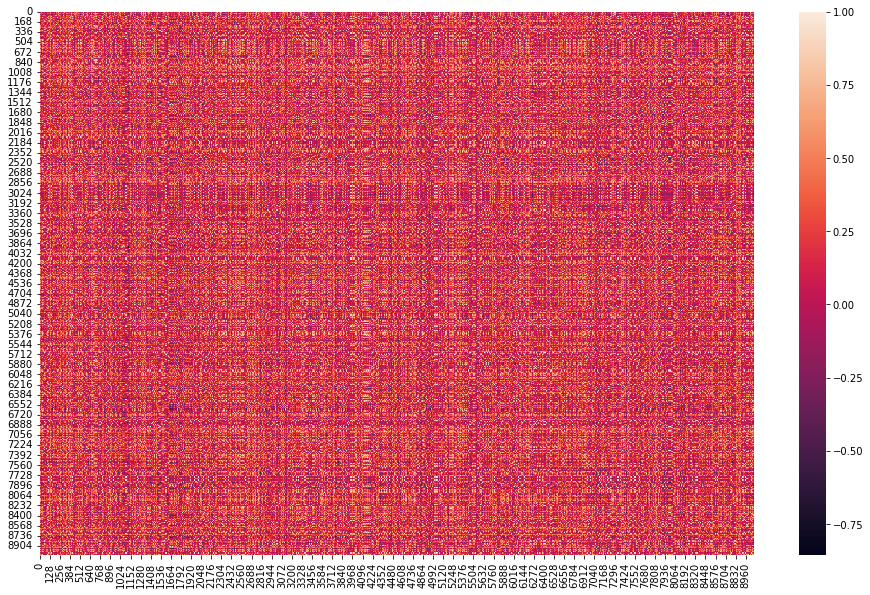

In [12]:
corr = np.corrcoef(matrix) # 12개의 요소로 피어슨 상관계수를 구한다
plt.figure(figsize=(16, 10))
sns.heatmap(corr)


<AxesSubplot:>

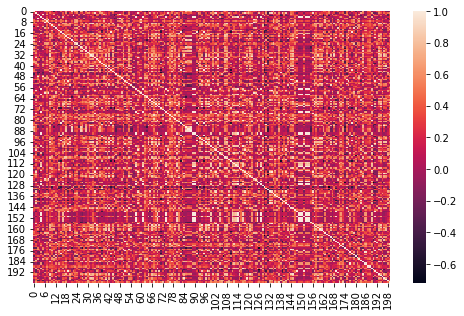

In [13]:
corr2 = corr[:200, :200] # 표본이 크기에 200*200 사이즈로 추출해서 다시 heatmap을 만들어준다.
plt.figure(figsize=(8, 5))
sns.heatmap(corr2)

이 상관계수를 이용하여 유사성이 높은 영화를 뽑아준다.

In [16]:
movie_title = user_movie_rating.columns
movie_title_list = list(movie_title)
selector = movie_title_list.index('Lion King, The (1994)')
corr_selector  = corr[selector]
list(movie_title[(corr_selector >= 0.90)])[:50]


['Ace Ventura: Pet Detective (1994)',
 'Ace Ventura: When Nature Calls (1995)',
 'Aladdin (1992)',
 'Batman (1989)',
 'Batman Forever (1995)',
 'Beauty and the Beast (1991)',
 'Casper (1995)',
 'Clueless (1995)',
 'Congo (1995)',
 'Dangerous Minds (1995)',
 'Dumb & Dumber (Dumb and Dumber) (1994)',
 'Forrest Gump (1994)',
 'Ghost (1990)',
 'Home Alone (1990)',
 'Indian in the Cupboard, The (1995)',
 'Interview with the Vampire: The Vampire Chronicles (1994)',
 'Jumanji (1995)',
 'Jurassic Park (1993)',
 'Last Action Hero (1993)',
 'Lion King, The (1994)',
 'Mask, The (1994)',
 'Maverick (1994)',
 'Mrs. Doubtfire (1993)',
 'Net, The (1995)',
 'Outbreak (1995)',
 'Pretty Woman (1990)',
 'Richie Rich (1994)',
 'Santa Clause, The (1994)',
 'Speed (1994)',
 'Tombstone (1993)']